In [1]:
### 週販レポート2025年版

# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
hard_sales_df = hs.load_hard_sales()
# hard_sales_dfをフィルタリング、report_date以前のデータに
hard_sales_df = hard_sales_df.loc[hard_sales_df["report_date"] <= report_date]
hard_event_df = he.load_hard_event()


def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str})"))

show_title(report_date)

# 国内ゲームハード週販レポート (2025-08-31)

* ハードウェアの販売データはファミ通の調査結果を元にしています。
* 一部のデータについては処理の都合上、1週間毎の値にアレンジしています。

## 直近4週間のハード売り上げ／累計推移


今週はSwitch2の落ち込みが目立ちます。お盆期間に売り切って一時的に供給がタイトなだけか、
ZA同梱版の大量出荷に備えて出荷を絞り始めたか判断するには来週を待つ必要があります。
Switch2 200万台は9月中に到達すると思われますが、第何週になるかは出荷次第です。

PS5の累計700万台が迫ってきました。9月頭からセールが始まるので、TGS前に「700万台達成」を
アナウンスできるかも知れません。9月の見どころです。


In [2]:
def last4weeks_report(df: pd.DataFrame) -> pd.DataFrame:
    last4weeks_df = hs.extract_latest(df, weeks=4)[['report_date', 'full_name', 'units', 'sum_units']]
    
    last4weeks_df.set_index(['report_date', 'full_name'], inplace=True)
    last4weeks_df.sort_values(by=['report_date', 'units', 'full_name'], ascending=[True, False, True], inplace=True)

    # カラム名を日本語にする
    last4weeks_df.columns = ['販売数', '累計']
    # indexを日本語にする
    last4weeks_df.index.names = ['報告日', 'ハード']
    last4weeks_df.index = last4weeks_df.index.set_levels(
        last4weeks_df.index.levels[0].strftime('%Y-%m-%d'), level=0
    )
    # スタイルを適用して表示
    styled = last4weeks_df.style.format({'販売数': '{:,}', '累計': '{:,}'})
    return styled

display(last4weeks_report(hard_sales_df))

## 2025年の週販推移

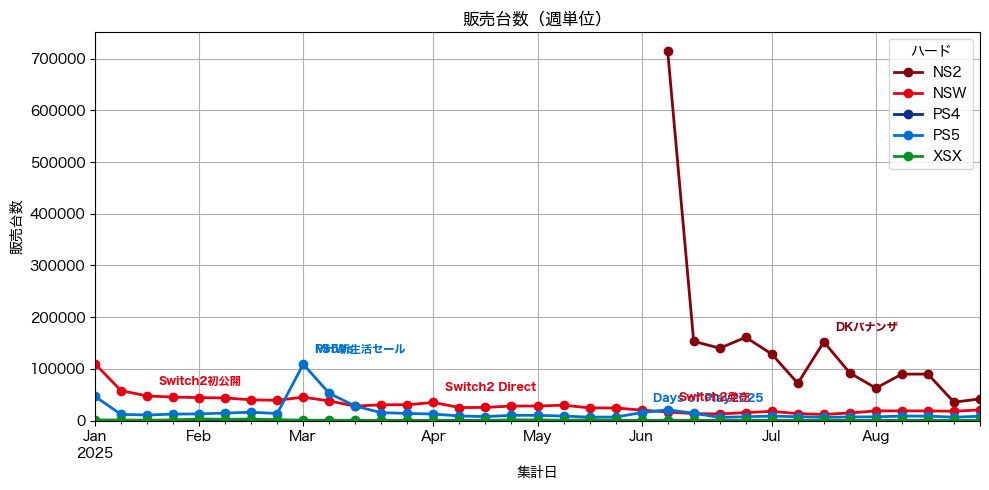

In [3]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), event_flag=True, event_priority=2)

### 2025年の週販推移(Switch2以外を拡大）

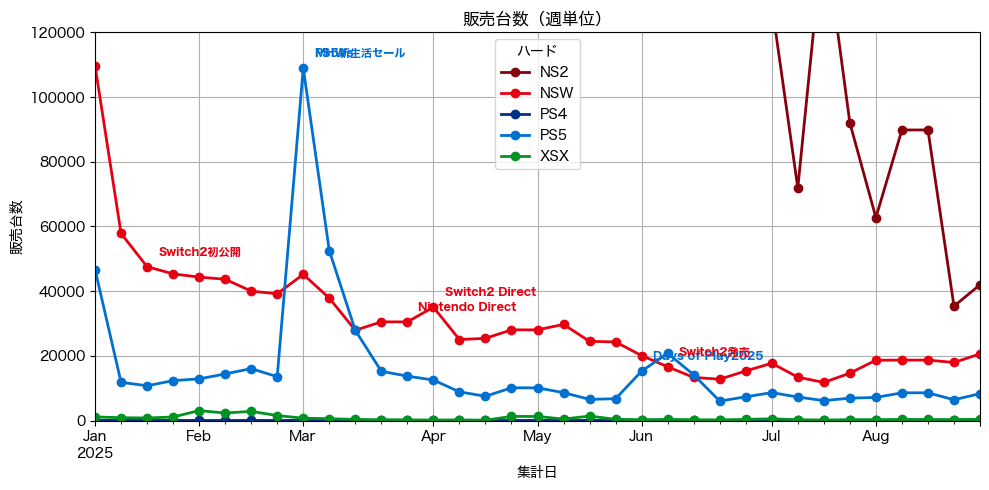

In [4]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), ymax=120000, event_flag=True, event_priority=3)

## 累計状況(Switch, PS5, Switch2)

#### 発売日からの累計販売状況

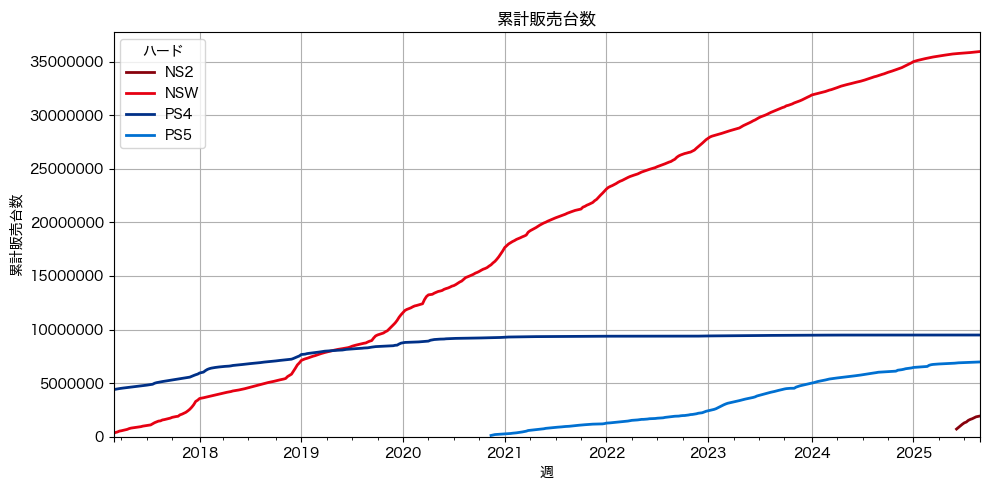

In [7]:
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW'], begin=datetime(2017,3,1), event_flag=False, event_priority=1)

#### 累計販売状況（ロンチ揃え)

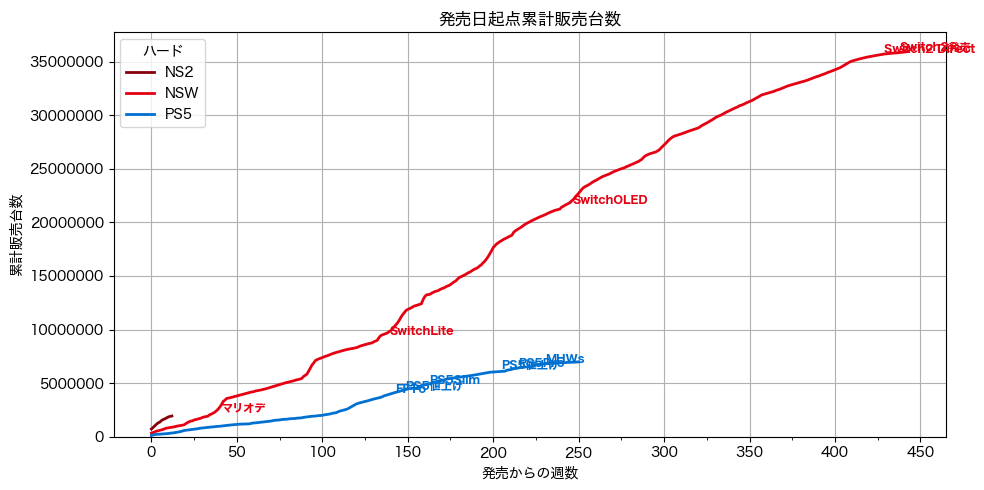

In [8]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['NS2', 'PS5', 'NSW'], xgrid=50, event_flag=True, event_priority=1)

## PS5の障壁は大きいのか？



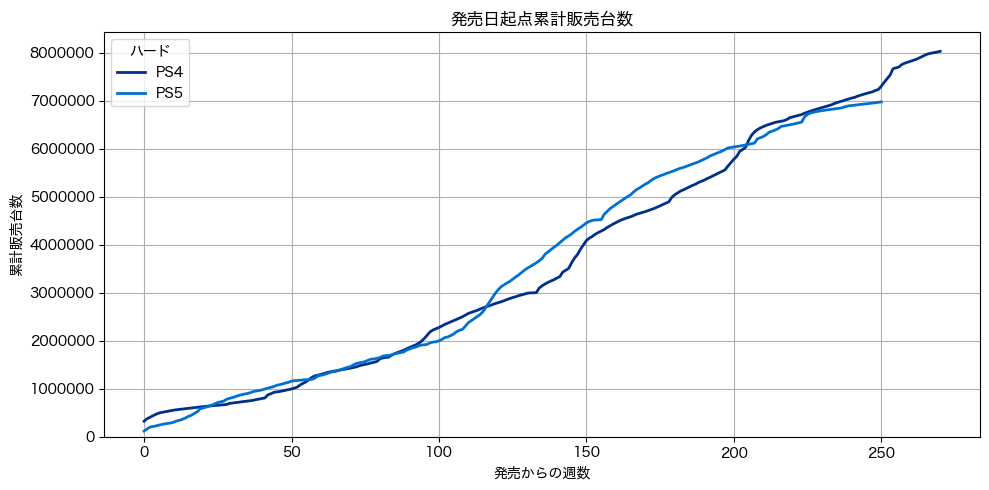

In [10]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=270)

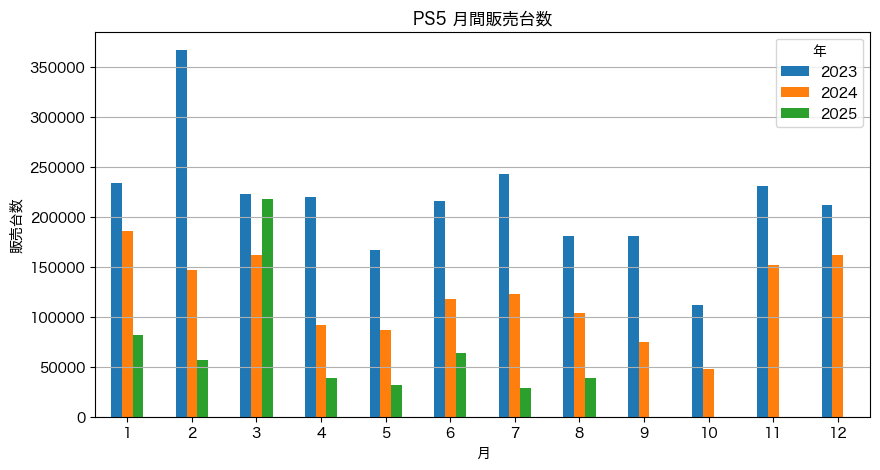

In [11]:
(fig, df) = ph.plot_monthly_histogram(hw='PS5', begin=datetime(2023, 1, 1))

In [30]:
df[2025].iloc[2]

218300.0

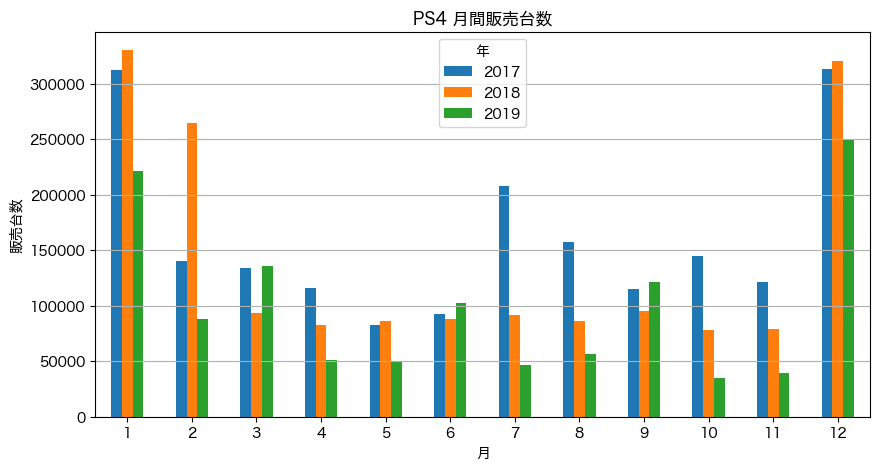

In [12]:
(fig, df) = ph.plot_monthly_histogram(hw='PS4', begin=datetime(2017, 1, 1), end=datetime(2019, 12, 31))

In [25]:
df[2018].iloc[1]

264042

df

## Switch2販売状況

### 歴代機種との比較

Switch2はGBAに次ぐ歴代2位の初動を維持。3位のDSを引き離しGBAに迫る状況。

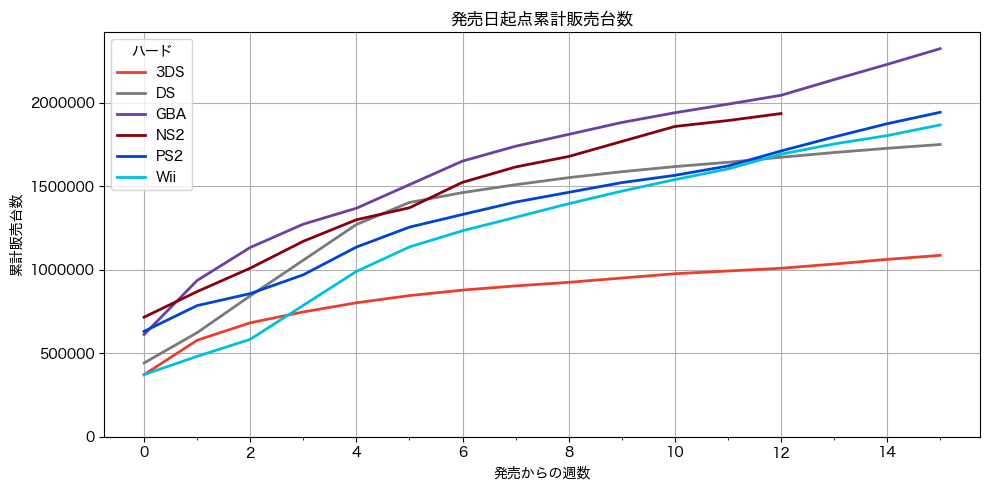

In [15]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                        mode="week", xgrid=2, end=15)

## Switch/Switch2ロンチ比較

ロンチ週以降のSwitchとSwitch2の販売状況の比較です。
実質的にSwitchとSwitch2の国内出荷状況を比較しています。

先週までは、概ね、Switch2はSwitchの2倍以上の出荷を行なってきましたが、
今週は落ち込んでいます。

Switchの場合は10周目以降では3万台未満の出荷状況に落ち着き年末商戦に向けて仕込みを行なっています。
この時期はSplatoon3に向けた需要も高く、Switchの入手が困難な時期でした。

Switch2の場合は11周目で4万台を切りました。このままZA発売まで抑制された出荷状況が続くのか、
今週の落ち込みが一時的な現象なのか、ここから先の出荷状況に注目です。



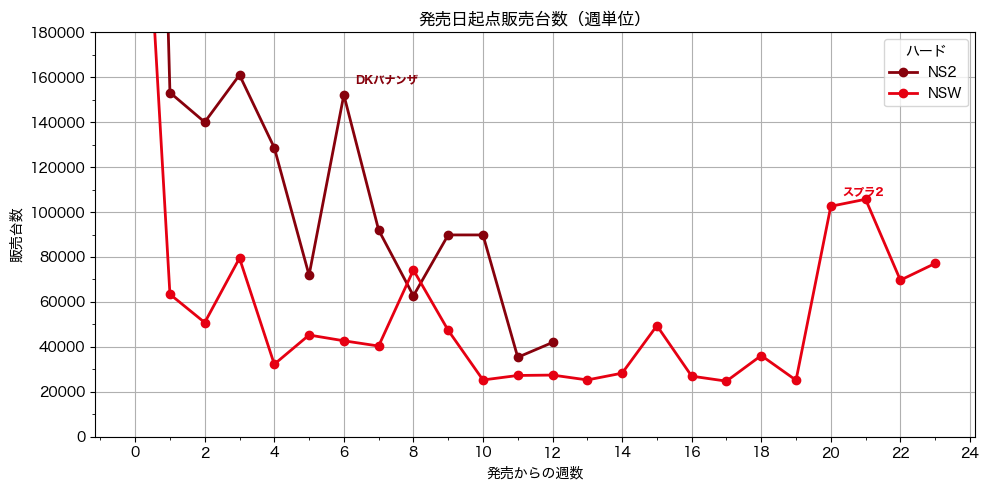

In [18]:
(fig, df) = ph.plot_sales_by_delta(hw=["NSW", "NS2"], end=23, ymax=180000, xgrid=2, ygrid=20000, mode="week", event_flag=True, event_priority=3)

## ハードメーカーシェア

(2025年のシェアは1月から現時点までの状況です)

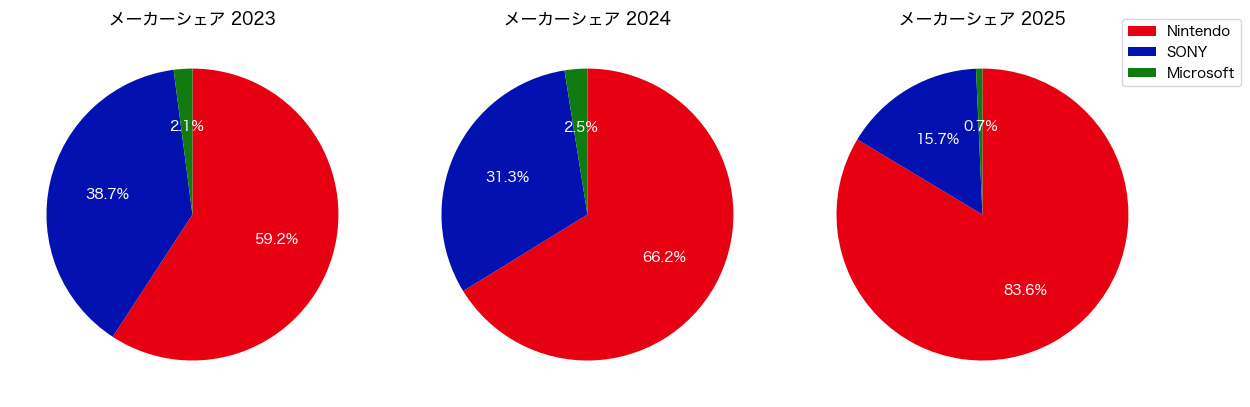

In [19]:
(fig, df) = ph.plot_maker_share_pie(begin_year=2023, end_year=2025)
